# Descriptions
Ref:  
- [module: ktrain](https://github.com/amaiya/ktrain)

- BERT stands for Bidirectional Encoder Representations from Transformers
- BERT was developed by researchers at Google in 2018
- BERT is a text representation technique like Word Embeddings.

# Google Colab

In [ ]:
%%capture
# capture will not print in notebook

import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## install modules
    !pip install -q ktrain
    !pip install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

    ## print
    print('Environment: Google Colaboratory.')

# NOTE: If we update modules in gcolab, we need to restart runtime.

In [ ]:
import tensorflow as tf
import ktrain

from pprint import pprint
pprint([(x.__name__,x.__version__) for x in [tf, ktrain]])

[('tensorflow', '2.3.0'), ('ktrain', '0.21.2')]


# Load the libraries

In [ ]:
import numpy as np
import pandas as pd

pd.set_option('max_colwidth',200)
pd.set_option('max_columns',200)
SEED = 100

import sys
import re
from tqdm import tqdm
tqdm.pandas()

pprint([(x.__name__,x.__version__) for x in [np,pd]])

[('numpy', '1.18.5'), ('pandas', '1.0.5')]


# Load the data

In [ ]:
p = 'https://github.com/bhishanpdl/Datasets/blob/master/AV_Hackathons/sentiment_analysis/raw/'
df_train = pd.read_csv(p + 'train.csv?raw=true',usecols=['label','tweet'])
df_test = pd.read_csv(p + 'test.csv?raw=true')

print(f"train : {df_train.shape}")
print(f"test : {df_test.shape}")
display(df_train.head(2).append(df_train.tail(2)))

target = 'label'
maincol = 'tweet'

train : (7920, 2)
test : (1953, 2)


,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
7918,0,"Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/"
7919,0,Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/


In [ ]:
display(df_test.head(2).append(df_test.tail(2)))

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
1951,9872,@codeofinterest as i said #Adobe big time we may well as include #apple to
1952,9873,Finally I got it .. thanx my father .. #Samsung #galaxy #s3 #gift #father #phone #new http://instagr.am/p/NoxkiPE


# Train Validation split using ktrain

In [ ]:
# [i for i in dir(ktrain.text) if i[0]!='_']

# ktrain.text.texts_from_df?

In [ ]:
%%time

(X_train, y_train), (X_valid, y_valid), preproc = \
ktrain.text.texts_from_df(df_train,
    text_column=maincol,
    label_columns=[target],
    random_state=SEED,
    ngram_range=1,
    max_features=20000,
    val_df = None, # if not 10% of train is used
    maxlen=500,
    preprocess_mode='bert')

model = ktrain.text.text_classifier(name='bert',
                             train_data=(X_train, y_train),
                             metrics=['accuracy'],
                             preproc=preproc)

learner = ktrain.get_learner(model=model,
                             train_data=(X_train, y_train),
                             val_data=(X_valid, y_valid),
                             batch_size=6)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


CPU times: user 3.58 s, sys: 90.2 ms, total: 3.67 s
Wall time: 3.69 s


In [ ]:
type(X_train), X_train[0].shape, X_valid[0].shape

(list, (7128, 500), (792, 500))

## Train Validation split using sklearn

Official tutorial: https://nbviewer.jupyter.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-A3-hugging_face_transformers.ipynb

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X_train,X_valid, y_train, y_valid = train_test_split(df_train[maincol].to_numpy().ravel(),
#                                                      df_train[target].to_numpy().ravel(),
#                                                      random_state=SEED,
#                                                      stratify=df_train[target])

# MODEL_NAME = 'distilbert-base-uncased'
# transformer = ktrain.text.Transformer(MODEL_NAME, maxlen=500,class_names=df_train[target].unique().tolist())

# data_train = transformer.preprocess_train(X_train, y_train)
# data_valid = transformer.preprocess_test(X_valid, y_valid)
# model = transformer.get_classifier()
# learner = ktrain.get_learner(model, train_data=data_train, val_data=data_valid, batch_size=6)

# print(type(data_train))

array(['@Mahmoud_Abdou the apps in the App Store are suck and can’t even get one with full features apple',
       'My girl loves apples #beautiful #autumn #apple #tree #nature #stückle #garden … https://www.instagram.com/p/BMe1vomhNJA/',
       'Keeping my #music to my ear #pandora #iPhone #iTunes #Monica #MariahCarey #Beyonce #RnB #respect #aber http://instagr.am/p/S1JDd0tjnR/',
       ...,
       'RIP Steve Jobs..i now see why he retired a month ago but a sad day still #greatinventor',
       'New ReallyReal v2.1 #Photobooth for #iphone #ipad #Dating - http://reallyreal.com/ #college #sorority picOvb0k pic.twitter.com/qVqnHniV1b',
       '#Dogswell #Veggie #Life #Hips #Chicken & #Apple #Treats #for #Adult #Dogs, 5-Ounce… http://goo.gl/fb/CF7T8'],
      dtype=object)

# Text Modelling: ktrain and bert

name is one of:
```
'fasttext' 'nbsvm' 'logreg'  'bigru'  'bert' 'distilbert' 
```

In [ ]:
# ktrain.text.text_classifier?

In [ ]:
ktrain.text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face [https://arxiv.org/abs/1910.01108]


In [ ]:
# [i for i in dir(model) if i[0]!='_']

In [ ]:
# [i for i in dir(learner) if i[0]!='_']

In [ ]:
# # find good learning rate
# learner.lr_find()             # briefly simulate training to find good learning rate
# learner.lr_plot()             # visually identify best learning rate

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
1188/1188 [==============================] - 577s 485ms/step - loss: 0.1129 - accuracy: 0.9572


done.
Visually inspect loss plot and select learning rate associated with falling loss


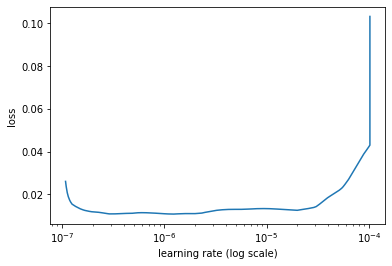

In [ ]:
%%time
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
%%time
# use gpu
learner.fit_onecycle(lr=2e-5,epochs=4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
1188/1188 [==============================] - 583s 490ms/step - loss: 0.0167 - accuracy: 0.9952 - val_loss: 0.5181 - val_accuracy: 0.9028
Epoch 2/4
1188/1188 [==============================] - 574s 483ms/step - loss: 0.0369 - accuracy: 0.9871 - val_loss: 0.3018 - val_accuracy: 0.9104
Epoch 3/4
1188/1188 [==============================] - 573s 482ms/step - loss: 0.0329 - accuracy: 0.9879 - val_loss: 0.3500 - val_accuracy: 0.9104
Epoch 4/4
1188/1188 [==============================] - 573s 482ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.4698 - val_accuracy: 0.9066
CPU times: user 43min 27s, sys: 5min 13s, total: 48min 40s
Wall time: 38min 32s


In [ ]:
learner.validate(val_data=(X_valid, y_valid))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       599
           1       0.78      0.85      0.82       193

    accuracy                           0.91       792
   macro avg       0.87      0.89      0.88       792
weighted avg       0.91      0.91      0.91       792



array([[553,  46],
       [ 28, 165]])

In [ ]:
print([i for i in dir(learner) if i[0]!='_'])

['autofit', 'batch_size', 'eval_batch_size', 'evaluate', 'fit', 'fit_onecycle', 'freeze', 'get_weight_decay', 'ground_truth', 'history', 'layer_output', 'load_model', 'lr_estimate', 'lr_find', 'lr_finder', 'lr_plot', 'model', 'multigpu', 'plot', 'predict', 'print_layers', 'reset_weights', 'save_model', 'set_lr', 'set_model', 'set_weight_decay', 'top_losses', 'train_data', 'unfreeze', 'use_multiprocessing', 'val_data', 'validate', 'view_top_losses', 'workers']


In [ ]:
learner.evaluate()

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       599
           1       0.82      0.87      0.84       193

    accuracy                           0.92       792
   macro avg       0.89      0.90      0.90       792
weighted avg       0.92      0.92      0.92       792



array([[563,  36],
       [ 26, 167]])

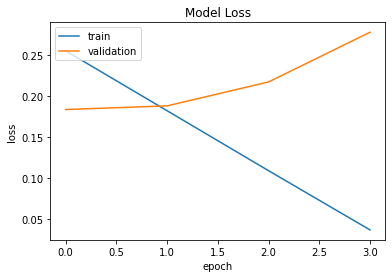

In [ ]:
learner.plot()

In [ ]:
valid_preds = learner.predict()
len(valid_preds), df_train.shape, valid_preds[:5]

(792, (7920, 2), array([[9.9998856e-01, 1.1439688e-05],
        [9.9998355e-01, 1.6401149e-05],
        [9.9999571e-01, 4.2624361e-06],
        [9.9999678e-01, 3.2307878e-06],
        [9.9998748e-01, 1.2558288e-05]], dtype=float32))

# Model Prediction on Test data using ktrain

In [ ]:
# ktrain.get_predictor?

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
[i for i in dir(predictor) if i[0]!='_']

['analyze_valid',
 'batch_size',
 'c',
 'explain',
 'get_classes',
 'model',
 'predict',
 'predict_proba',
 'preproc',
 'save']

In [ ]:
predictor.get_classes()

['not_label', 'label']

In [ ]:
df_train['label'].unique()

array([0, 1])

In [ ]:
# we have actually labels 0 and 1 but ktrain gives not_label and label
# 0 is not_label
# 1 is label

In [ ]:
one_sent = df_test[maincol][0]
one_sent

"I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks"

In [ ]:
predictor.predict(one_sent)

'label'

In [ ]:
predictor.explain(one_sent)

In [ ]:
X_test = df_test[maincol].to_numpy()

In [ ]:
test_preds = predictor.predict(X_test,return_proba=False)

In [ ]:
df_test[target] = test_preds

In [ ]:
df_sub = df_test[['id','label']]
df_sub['label'] = df_sub['label'].replace({'not_label': 0, 'label': 1})
df_sub.to_csv('sub_ktrain_default.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
!tail -2 sub_ktrain_default.csv

9872,0
9873,0
